# **<span style="color: #0098cd;">Comparación de algoritmos de Clustering (K-Means, DBSCAN, Jerárquico)</span>**

## **Objetivos**

## **Descripción**

El conjunto de datos con el que voy a trabajar se encuentra en: https://www.kaggle.com/datasets/umerrtx/machine-failure-prediction-using-sensor-data

Este conjunto de datos contiene datos de sensores recopilados de varias máquinas, con el objetivo de predecir fallos de las máquinas con antelación. Incluye una variedad de lecturas de sensores, así como las fallas de la máquina registradas.

Este archivo contiene 944 mediciones de sensores de diferentes máquinas, también contiene una etiqueta de si hay fallo o no.

Notas:
1. footfall: The number of people or objects passing by the machine.
2. tempMode: The temperature mode or setting of the machine.
3. AQ: Air quality index near the machine.
4. USS: Ultrasonic sensor data, indicating proximity measurements.
5. CS: Current sensor readings, indicating the electrical current usage of the machine.
6. VOC: Volatile organic compounds level detected near the machine.
7. RP: Rotational position or RPM (revolutions per minute) of the machine parts.
8. IP: Input pressure to the machine.
9. Temperature: The operating temperature of the machine.
10. fail: Binary indicator of machine failure (1 for failure, 0 for no failure).

## **Análisis exploratorio de los datos**

#### **Carga del dataset**

In [123]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


df = pd.read_csv('data.csv', sep=',') # Cargo el dataset

#### **Número de instancias del dataset**

In [124]:
num_instancias = df.shape[0]                            # Número de instancias 
print(f"El dataset tiene {num_instancias} instancias.")

El dataset tiene 944 instancias.


#### **Tipos de datos en el dataset**

In [125]:
tipos_datos = df.dtypes # Tipo de datos de cada columna

tipo_predominante = tipos_datos.value_counts() # Cuento la frecuencia de cada tipo de dato
print(tipo_predominante)

print(70*'_')
print(df.describe()) # Muestro las estadísticas básicas


int64    10
Name: count, dtype: int64
______________________________________________________________________
          footfall    tempMode          AQ         USS          CS  \
count   944.000000  944.000000  944.000000  944.000000  944.000000   
mean    306.381356    3.727754    4.325212    2.939619    5.394068   
std    1082.606745    2.677235    1.438436    1.383725    1.269349   
min       0.000000    0.000000    1.000000    1.000000    1.000000   
25%       1.000000    1.000000    3.000000    2.000000    5.000000   
50%      22.000000    3.000000    4.000000    3.000000    6.000000   
75%     110.000000    7.000000    6.000000    4.000000    6.000000   
max    7300.000000    7.000000    7.000000    7.000000    7.000000   

              VOC          RP          IP  Temperature        fail  
count  944.000000  944.000000  944.000000   944.000000  944.000000  
mean     2.842161   47.043432    4.565678    16.331568    0.416314  
std      2.273337   16.423130    1.599287     5.97478

Se observa que el dataset tiene 944 registros y 10 columnas, en las que todos los valores son enteros. Coincide con la información en Kaggle, por lo que está correctamente cargado.

#### **Existencia de variables continuas y categóricas**

In [126]:
print(80*'_')
for column in df.columns:
    print(f"{column}: {df[column].unique()}") # Muestro los valores únicos de cada columna


________________________________________________________________________________
footfall: [   0  190   31   83  640  110  100  180 2800 1600  330 1000  130    5
   33   19   74   12  390   40    3  450  350   64   62   11    4   35
  270   45    6    2 3500   67   30  400   15   22   32   59  170    1
   53   16   27   84  200   20 7300   13    9   44   51   29  630   50
  720   24   55   63   71  900  370  470   47    8  290   10   93  510
   56    7  140   14  310   37   23  360   87   42   70  520   54   75
   34   76  430  150   25   18  740   81  160  220   26   88   66  570
   17]
tempMode: [7 1 4 3 0 5 2 6]
AQ: [7 3 2 5 4 6 1]
USS: [1 3 2 4 6 7 5]
CS: [6 5 4 3 7 2 1]
VOC: [6 1 0 4 3 5 2]
RP: [36 20 24 28 68 21 77 31 39 26 22 42 74 62 58 51 88 27 44 45 40 48 34 60
 32 33 57 84 75 19 47 35 43 76 46 38 69 67 72 37 30 64 59 55 65 73 91 71
 83 53 82 49 56 25 85 70 78 80 79 66 87 52 29 41 23 50 61 63 54 89 81]
IP: [3 4 6 2 5 1 7]
Temperature: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 1

Observando los valores que toman las variables del dataset y su descripción en el mismo, se podría decir que:

- Continuas: Temperature, RP, footfall -----------------> Dado que representan valores númericos en un rango amplio y no categorías
- Categóricas: tempMode, fail, AQ, USS, CS, VOC, IP.  -> Dado que representan categorías, niveles, clasificaciones, etc

#### **Comprobación de valores nulos o faltantes**

In [127]:
datos_faltantes = df.isnull().sum()
print(datos_faltantes)

footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64


El dataset no cuenta con valores nulos ni faltantes. Es importante que esto sea así, ya que garantiza que los algoritmos de clustering puedan calcular correctamente las distancias entre los datos, evitando sesgos en la agrupación, problemas de convergencia y errores en la detección de patrones, lo que permite obtener resultados más precisos y representativos de la estructura real de los datos.

#### **Eliminación de la variable fail**

In [128]:
df = df.drop(columns=['fail']) # Elimino la variable 'fail'
print(df.head())               # Compruebo que ha sido eliminada

   footfall  tempMode  AQ  USS  CS  VOC  RP  IP  Temperature
0         0         7   7    1   6    6  36   3            1
1       190         1   3    3   5    1  20   4            1
2        31         7   2    2   6    1  24   6            1
3        83         4   3    4   5    1  28   6            1
4       640         7   5    6   4    0  68   6            1


Es importante eliminar la variable "fail" ya que representa una etiqueta binaria de fallo.

Dado que el objetivo del clustering es descubrir estructuras ocultas en los datos sin conocer previamente las etiquetas, incluir una variable como "fail" podría sesgar el proceso y hacer que el algoritmo agrupe los datos en función de una información que ya clasifica los registros, convirtiendo la tarea en algo más cercano a un problema de clasificación supervisada. Eliminar "fail" permite que el algoritmo agrupe los datos basándose únicamente en las características intrínsecas de las muestras, sin que una variable de resultado condicione el análisis.

#### **Distribución de los datos y test de normalidad**

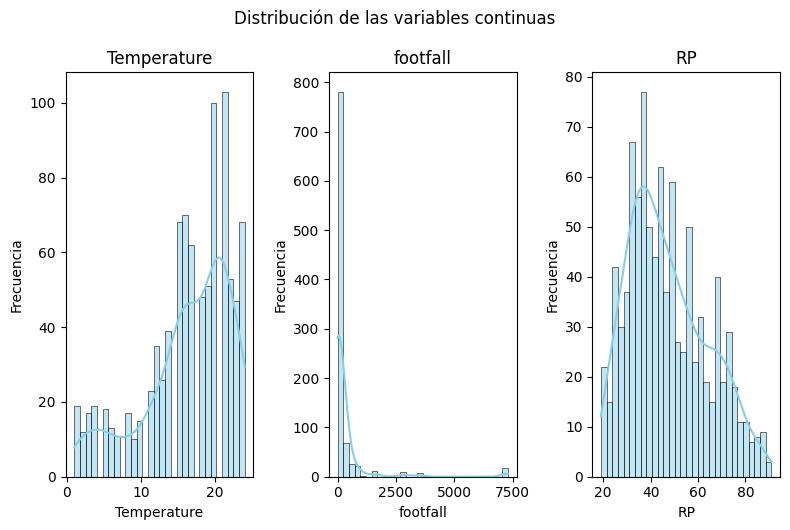

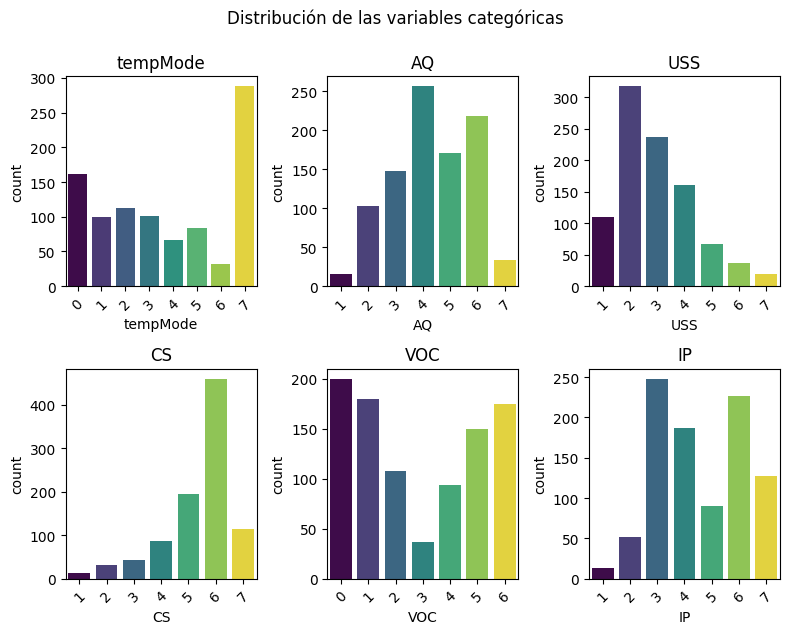

In [129]:
# Variables continuas y categóricas
continuous_vars = ['Temperature', 'footfall', 'RP']
categorical_vars = ['tempMode', 'AQ', 'USS', 'CS', 'VOC', 'IP']


# Representación gráfica de variables continuas
plt.figure(figsize=(8, 5))
for i, col in enumerate(continuous_vars, 1): # 
    plt.subplot(1, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f"{col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.suptitle("Distribución de las variables continuas", fontsize=12, y=1.05)
plt.show()


# Representación gráfica de variables categóricas
plt.figure(figsize=(8, 6))
for i, col in enumerate(categorical_vars, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=df[col], hue=df[col], palette="viridis", legend=False)
    plt.title(f"{col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.suptitle("Distribución de las variables categóricas", fontsize=12, y=1.05)
plt.show()

En las distribuciones de las variables continuas se puede ver que ninguna sigue una distribución normal. La variable footfall está especialmente sesgada con una gran concentración en valores bajos y pocos valores muy altos.

Las variables categóricas tienen distribuciones desiguales. Variables como tempMode y CS tienen categorías con mucha diferencia en frecuencia, lo que puede influir en los resultados del clustering.

In [130]:
from scipy.stats import shapiro 

# Test de Shapiro-Wilk SOLO para variables continuas
print("\n--- Test de Normalidad (Shapiro-Wilk) ---")
for col in continuous_vars:
    stat, p = shapiro(df[col].dropna())  # Aplico el test de Shapiro-Wilk a cada variable continua
    print(f"{col}: p-value = {p:.5f}")

    if p < 0.05:                         # Umbral del 5%
        print(f" → ❌ {col} NO sigue una distribución normal")
    else:
        print(f" → ✅ {col} sigue una distribución normal")


--- Test de Normalidad (Shapiro-Wilk) ---
Temperature: p-value = 0.00000
 → ❌ Temperature NO sigue una distribución normal
footfall: p-value = 0.00000
 → ❌ footfall NO sigue una distribución normal
RP: p-value = 0.00000
 → ❌ RP NO sigue una distribución normal


Aunque con las distribuciones era evidente que las variables no seguían una distribución normal, decidí realizar el test de Shapiro-Wilk para confirmarlo. 

#### **Detección de Outliers**

Dado que las variables continuas no sigue distribuciones normales, usaré el método de rango intercuartílico, que es más robusto para distribuciones sesgadas. 

Si las distribuciones hubieran sido más normales, hubiera utilizado el método de Z-Score.

In [131]:
continuous_vars = ['Temperature', 'footfall', 'RP'] # Selecciono las variables continuas

# Cálculo del IQR
Q1 = df[continuous_vars].quantile(0.25)  # Primer cuartil (25%)
Q3 = df[continuous_vars].quantile(0.75)  # Tercer cuartil (75%)
IQR = Q3 - Q1                            # Rango Intercuartílico

# Definir umbrales para detección de outliers
lower_bound = Q1 - 1.75 * IQR
upper_bound = Q3 + 1.75 * IQR

outliers = (df[continuous_vars] < lower_bound) | (df[continuous_vars] > upper_bound) # Detecto outliers

print("\nNúmero de outliers:")
print(outliers.sum())                 # Muestro el número de outliers por columna

df_no_out = df[~outliers.any(axis=1)] # Elimino filas con outliers

print(f"\nEl dataset tenía {df.shape[0]} instancias y ahora tiene {df_no_out.shape[0]} tras eliminar outliers.")



Número de outliers:
Temperature     19
footfall       141
RP               0
dtype: int64

El dataset tenía 944 instancias y ahora tiene 789 tras eliminar outliers.


#### **Estandarización de los datos**

Estandarizo solo las variables continuas.

In [132]:
from sklearn.preprocessing import StandardScaler

print("\n--- Estandarización ---")

scaler = StandardScaler()
df_cont_scaled = pd.DataFrame(scaler.fit_transform(df_no_out[continuous_vars]), columns=continuous_vars) # Aplico estandarización SOLO a las variables continuas

df_final = pd.concat([df_cont_scaled, df_no_out[categorical_vars].reset_index(drop=True)], axis=1)       # Mantengo las variables categóricas sin cambios

print(df_final.head()) # Muestro las primeras filas del dataset final

# Verifico media y desviación estándar de las variables estandarizadas
print("\nMedia de las variables estandarizadas:\n", df_final[continuous_vars].mean())              # Debe ser ~0
print("\nDesviación estándar de las variables estandarizadas:\n", df_final[continuous_vars].std()) # Debe ser ~1



--- Estandarización ---
   Temperature  footfall        RP  tempMode  AQ  USS  CS  VOC  IP
0    -2.648105 -0.329971 -0.695690         2   2    1   4    0   3
1    -2.648105  0.553378  2.494160         7   4    4   7    2   2
2    -2.648105  2.416441 -1.677183         0   2    4   6    2   4
3    -2.648105 -0.442397 -1.247780         3   4    6   3    2   3
4    -2.648105 -0.635128 -0.204944         7   6    1   6    6   4

Media de las variables estandarizadas:
 Temperature   -7.204489e-17
footfall       0.000000e+00
RP             0.000000e+00
dtype: float64

Desviación estándar de las variables estandarizadas:
 Temperature    1.000634
footfall       1.000634
RP             1.000634
dtype: float64


## **<span style="color: #0098cd;">Algoritmo K-Means</span>**

## **<span style="color: #0098cd;">Algoritmo DBSCAN</span>**

## **<span style="color: #0098cd;">Algoritmo Clustering Jerárquico</span>**

## **Comparativa de algoritmos**